In [2]:
import pandas as pd
import umap

# Load the dataframe

In [3]:
dataPath = './data/'
df = pd.read_csv(dataPath + 'filtered_data.csv')

# Check the dataframe

In [8]:
# List all variables (columns) in the DataFrame
df
mask = 'BIO'

# Run the UMAP embedding

In [20]:
import umap
import pandas as pd

# Filter columns that contain the string in the 'mask' variable
filtered_data = df.loc[:, df.columns.str.contains(mask, case=False)]  # case=False makes it case-insensitive

# Drop non-numeric columns if necessary
numeric_data = filtered_data.select_dtypes(include=['number'])

# Apply UMAP to embed the data into 2D space
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(numeric_data, n_neighbors=500)

# Convert the embedding to a DataFrame for easier handling
embedding_df = pd.DataFrame(embedding, columns=['UMAP_1', 'UMAP_2'])

# Display or save the embedding
print(embedding_df)

/home/vlastimilo/PROJECTS/Hybernska/2.5Ga/libusin20250322/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


         UMAP_1     UMAP_2
0     21.289120  -3.036027
1     21.277981  -3.043213
2     21.290443  -3.034832
3     21.274216  -3.048481
4     21.295313  -3.032573
...         ...        ...
5036  -6.690026 -12.323076
5037  -6.689046 -12.324530
5038  -6.709675 -12.304368
5039  -6.741096 -12.273712
5040  -6.705118 -12.308859

[5041 rows x 2 columns]


# Plot the embedding

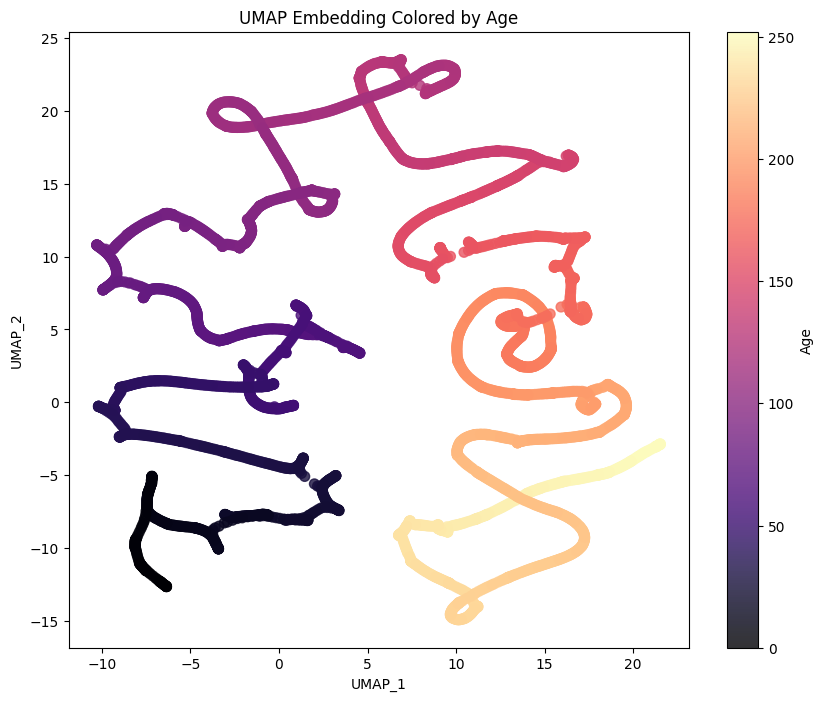

In [21]:
import matplotlib.pyplot as plt

# Add the 'Age' column to the embedding DataFrame for coloring
embedding_df['Age'] = df['Age'].reset_index(drop=True)  # Ensure alignment of indices

# Plot the embedding
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    embedding_df['UMAP_1'], 
    embedding_df['UMAP_2'], 
    c=embedding_df['Age'], 
    cmap='magma', 
    s=50, 
    alpha=0.8
)
plt.colorbar(scatter, label='Age')
plt.title('UMAP Embedding Colored by Age')
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.show()



# Spectral analysis (Welch)

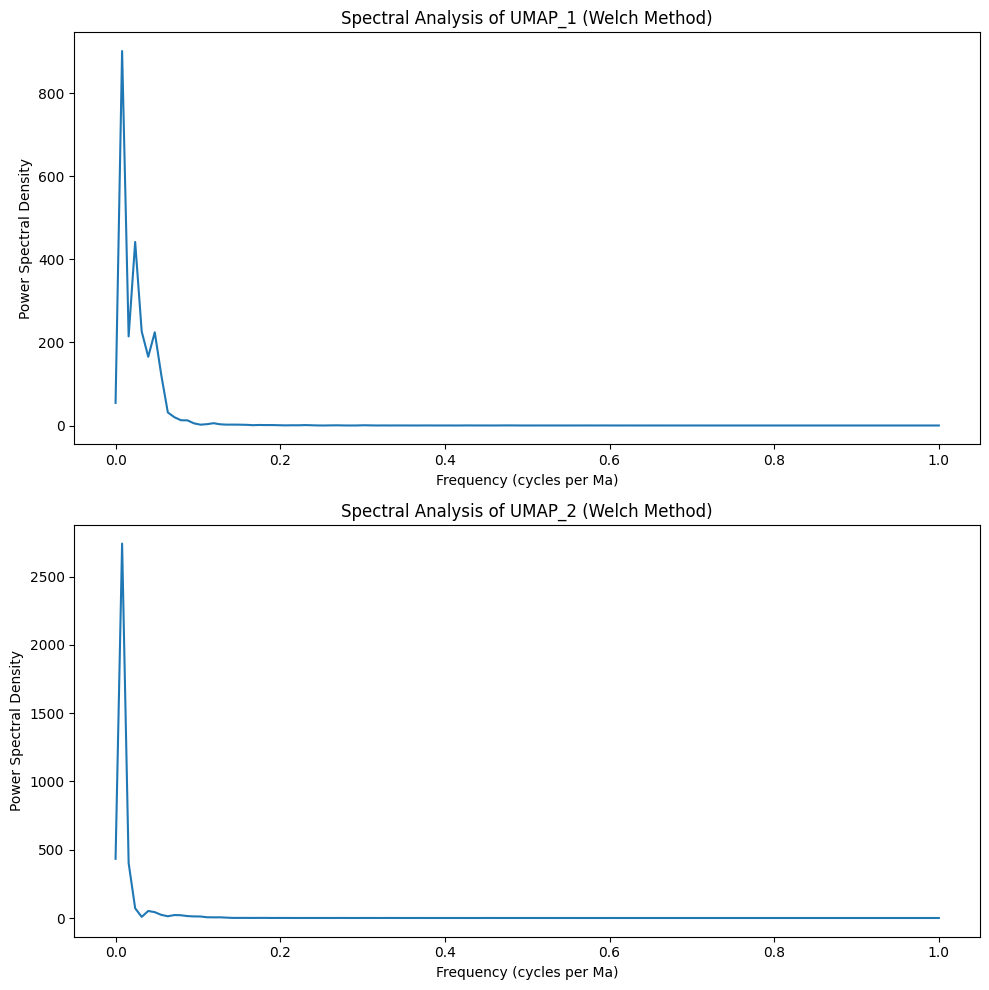

In [ ]:
from scipy.signal import welch

max_frequency = 0.5  # Maximum frequency to display in cycles per Ma
num_epochs = 2  # Number of epochs for the Welch method

# Demean UMAP_1 and UMAP_2
umap_1_demeaned = embedding_df['UMAP_1'] - embedding_df['UMAP_1'].mean()
umap_2_demeaned = embedding_df['UMAP_2'] - embedding_df['UMAP_2'].mean()

# Sampling frequency in Hz (1 / sampling interval in Ma)
sampling_frequency = 1 / 0.05  # Sampling frequency in cycles per Ma

# Apply Welch method to estimate the power spectral density
frequencies_umap_1, psd_umap_1 = welch(
    umap_1_demeaned, fs=sampling_frequency, nperseg=len(umap_1_demeaned) // num_epochs
)
frequencies_umap_2, psd_umap_2 = welch(
    umap_2_demeaned, fs=sampling_frequency, nperseg=len(umap_2_demeaned) // num_epochs
)

# Filter frequencies to show only up to the maximum frequency
mask_umap_1 = frequencies_umap_1 <= max_frequency
mask_umap_2 = frequencies_umap_2 <= max_frequency

# Plot spectral analysis results
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Spectral analysis for UMAP_1
axs[0].plot(frequencies_umap_1[mask_umap_1], psd_umap_1[mask_umap_1])  # Filtered frequencies and PSD
axs[0].set_title('Spectral Analysis of UMAP_1 (Welch Method)')
axs[0].set_xlabel('Frequency (cycles per Ma)')
axs[0].set_ylabel('Power Spectral Density')

# Spectral analysis for UMAP_2
axs[1].plot(frequencies_umap_2[mask_umap_2], psd_umap_2[mask_umap_2])  # Filtered frequencies and PSD
axs[1].set_title('Spectral Analysis of UMAP_2 (Welch Method)')
axs[1].set_xlabel('Frequency (cycles per Ma)')
axs[1].set_ylabel('Power Spectral Density')

plt.tight_layout()
plt.show()